In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [7]:
df = pd.read_excel("전국낚시터정보표준데이터.xls", sheet_name = 'Sheet1')

In [9]:
df.shape

(744, 21)

In [11]:
df.head()

,낚시터명,낚시터유형,소재지도로명주소,소재지지번주소,위도,경도,낚시터전화번호,수면적,주요어종,최대수용인원,...,이용요금,주요포인트,안전시설현황,편익시설현황,주변관광지,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,산내낚시터,저수지,대전광역시 동구 하소동 481-2번지,대전광역시 동구 하소동 481-2번지,36.208540,127.437533,042-273-0693,9000.0,붕어+향어,100,...,1일 20000원,-,구명부환+소화기+구급약품세트,매점+화장실+세면소,만인산자연휴양림,042-251-4646,대전광역시 동구청,2019-06-04,3640000,대전광역시 동구
1,지동낚시터,저수지,경상북도 안동시 고천지촌로 1061,경상북도 안동시 임동면 지리 383-21,36.506874,128.994122,NaN,64000.0,붕어+잉어,15,...,3000,NaN,낚시터입간판+관리선,화장실,임하댐,054-840-3843,경상북도 안동시청,2019-09-11,5070000,경상북도 안동시
2,장기낚시터,저수지,경상북도 안동시 북후면 북평로 697-16,경상북도 안동시 북후면 장기리 624-1,36.669932,128.702418,NaN,2119.0,붕어+잉어,30,...,20000,NaN,낚시터입간판+관리선,화장실,제비원,054-840-3843,경상북도 안동시청,2019-09-11,5070000,경상북도 안동시
3,선어대낚시터,기타,경상북도 안동시 남선면 기느리길 252,경상북도 안동시 남선면 신석리 975,36.544451,128.773898,NaN,448.0,붕어+잉어,50,...,10000,NaN,낚시터입간판+관리선,화장실,선어대,054-840-3843,경상북도 안동시청,2019-09-11,5070000,경상북도 안동시
4,피쉬랜드 낚시카페,기타,"경상북도 안동시 경북대로 427, 대신빌딩 202호",경상북도 안동시 옥동 989,36.566860,128.698575,NaN,50.0,붕어+잉어,24,...,10000,NaN,낚시터입간판+관리선,화장실,안동댐,054-840-3843,경상북도 안동시청,2019-09-11,5070000,경상북도 안동시


In [13]:
city = df["제공기관명"].value_counts()
city

충청남도 태안군    46
경기도 안성시     34
충청남도 예산군    33
충청북도 충주시    26
경기도 포천시     26
            ..
부산광역시 북구     1
경기도 하남시      1
경상북도 영천시     1
대전광역시 동구     1
경상북도 청도군     1
Name: 제공기관명, Length: 111, dtype: int64

In [18]:
city.plot.barh(figsize = (100,80), grid = True)

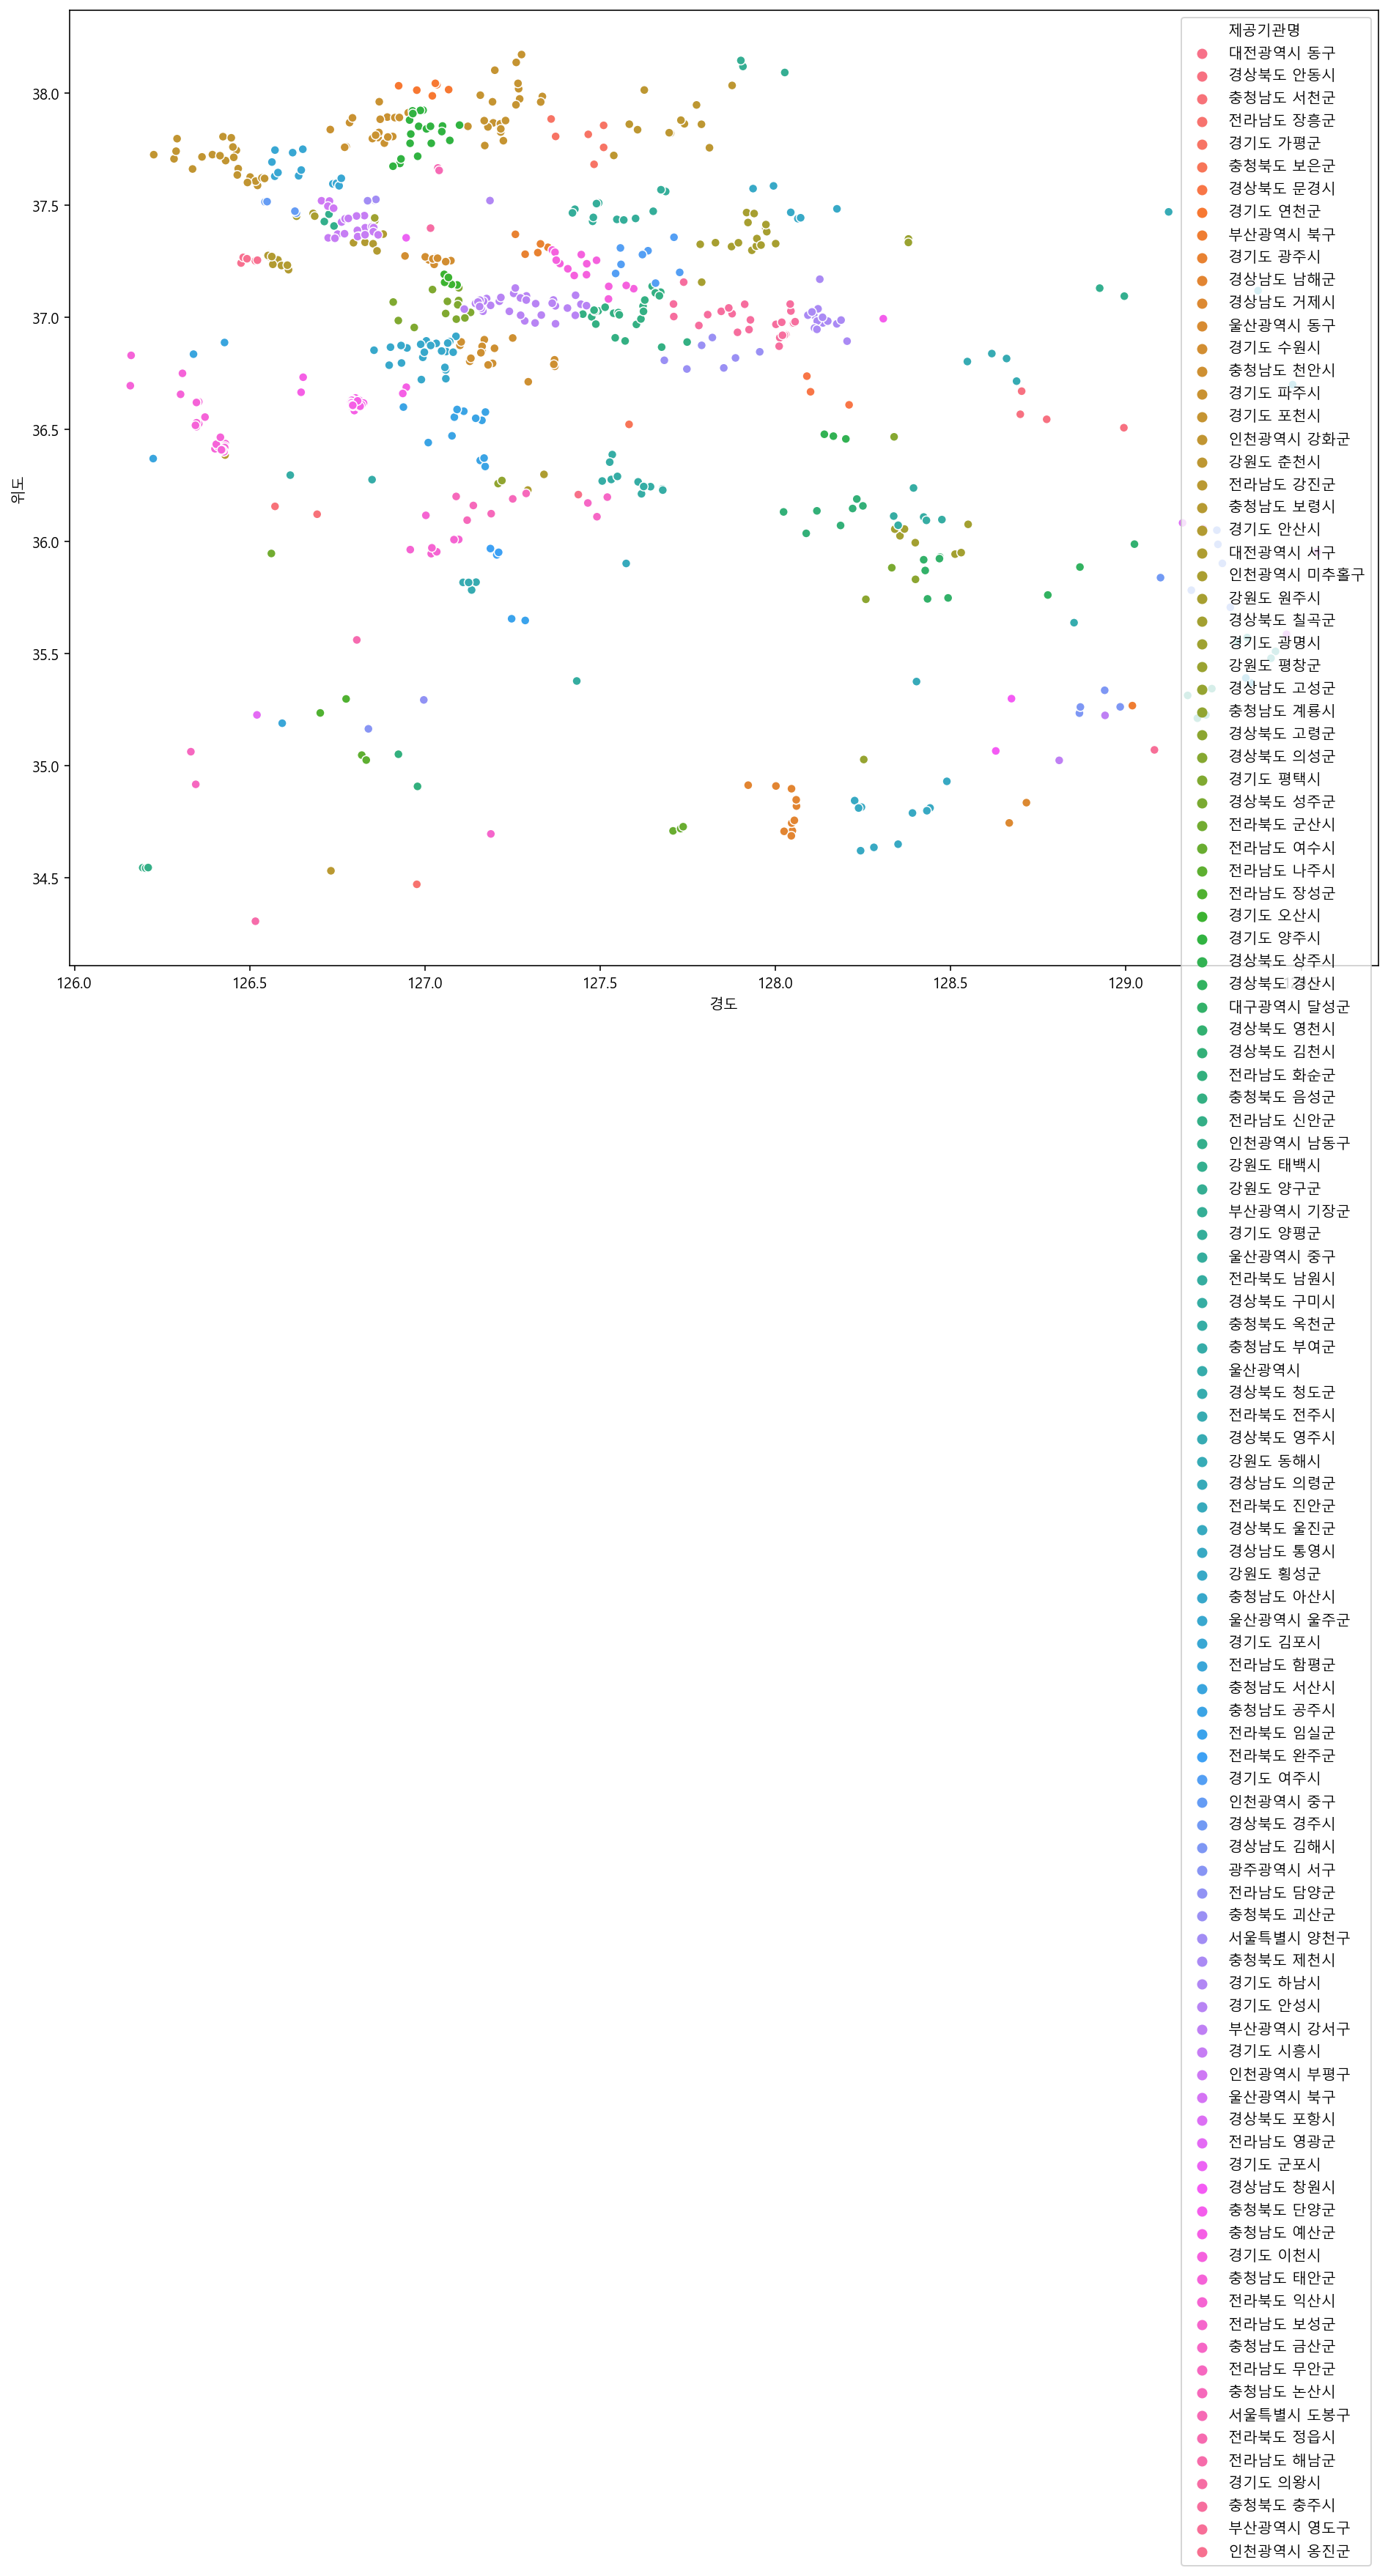

In [19]:
plt.figure(figsize = (16,12))
sns.scatterplot(data = df, x = "경도", y = "위도", hue = "제공기관명")

In [20]:
len(df)

744

In [21]:
import folium

In [22]:
df["위도"].mean()
df["경도"].mean()

127.4095975208516

In [43]:
map = folium.Map(location = [35.9078, 127.7669], zoom_start = 6)

for n in df.index:
    name = df.loc[n, "낚시터명"]
    address = df.loc[n, "소재지도로명주소"]
    popup = name
    location = [df.loc[n, "위도"], df.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map